# Проект: принятие решений в бизнесе

# Описание проекта

Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Приоритизация гипотез.

Выведем таблицу с гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

In [2]:
pd.options.display.max_colwidth = None

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Меняем регистр в названии столбцов
hypothesis.columns = hypothesis.columns.str.lower()

### Приоритизация гипотез методом ICE

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']
display(round(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False),1))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


По данному методу приоритезиции лидерами стали следующие гипотезы: Запустить акцию, дающую скидку на товар в день рождения, Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 

### Приоритизация гипотез методом RICE

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По данному методу приоритезиции лидерами стали следующие гипотезы: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа и Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

In [7]:
display(round(hypothesis[['hypothesis','ICE','RICE']].sort_values(by='ICE',ascending=False),1))

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


### Задача 

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

В топ 3 в двух методах приоритизации гипотез попали гипотезы о добавилении двух новых каналов привлечения трафика, что позволит привлекать на 30% больше пользователей и гипотеза о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Также с 5 места по методу ICE на 2 по RICE "поднялась" гипотеза о добавлении блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Связано это с высоким показателем Reach, который обозначает то, скольких пользователей затронет изменение, которое вы хотите внести.	

## Часть 2. Анализ A/B-теста

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим пользователей, котрые попали в обе группы и удалим их

In [9]:
two_gr = []
for x in orders[orders['group']=='A']['visitorId'].unique():
    if x in orders[orders['group']=='B']['visitorId'].unique():        
        two_gr.append(x)
print('Повторы:', len(two_gr))
print('Пользователи в обеих группах:', two_gr)

Повторы: 58
Пользователи в обеих группах: [4069496402, 199603092, 3803269165, 2378935119, 237748145, 4256040402, 2038680547, 1738359350, 2458001652, 3891541246, 2716752286, 3656415546, 2686716486, 2954449915, 2927087541, 3234906277, 457167155, 2579882178, 3957174400, 1648269707, 2780786433, 818047933, 2044997962, 1959144690, 3202540741, 1333886533, 351125977, 3951559397, 393266494, 3984495233, 4120364173, 4266935830, 1230306981, 1294878855, 1614305549, 8300375, 477780734, 1668030113, 3717692402, 3766097110, 3941795274, 471551937, 1316129916, 1801183820, 1602967004, 2587333274, 2600415354, 232979603, 3972127743, 1404934699, 276558944, 3062433592, 2654030115, 3963646447, 4186807279, 2712142231, 2949041841, 963407295]


In [10]:
orders = orders.query('visitorId not in @two_gr')

In [11]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [12]:
orders.duplicated().sum()

0

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.duplicated().sum()

0

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Таким образом, мы вывели таблицы с покупками и пользователями, проверили отсутстсвие дубликатов, а также изменили тип данных у столбца с датой. Еще мы удалили из таблицы с покупками тех пользователей, которые попали в обе группы теста.

### Кумулятивная выручка по группам

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [18]:
# Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов: 

In [20]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


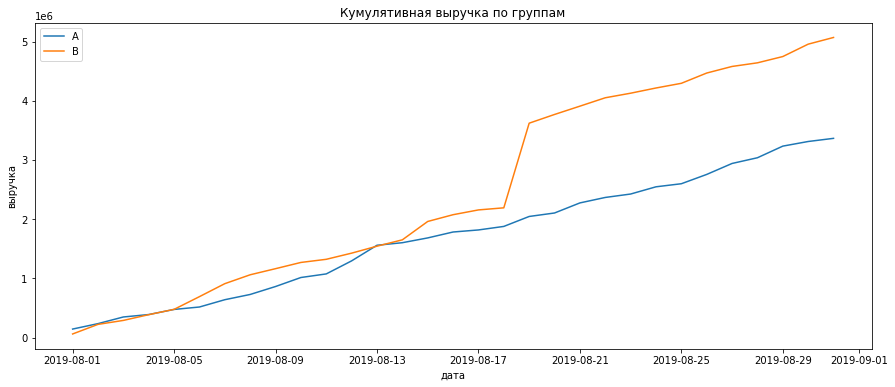

In [21]:
plt.figure(figsize=(15, 6))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title("Кумулятивная выручка по группам")
plt.xlabel("дата")
plt.ylabel("выручка");

Выручка группы А практически равномерно умеличивалась за все время, а у группы В произошел резкий скачок в период с 20 августа 2019. Возможно именно столько (примерно 3 недели) требуется посетителю магазина, чтобы принять решение о покупке, поэтому по истечению этого срока группа В, с тестируемым нововведением, показала резкий рост выручки. Также следует отметить, что на протяжении всего периода кумулятивная выручка группы В больше, чем у группы А.

###  Кумулятивный средний чек по группам

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

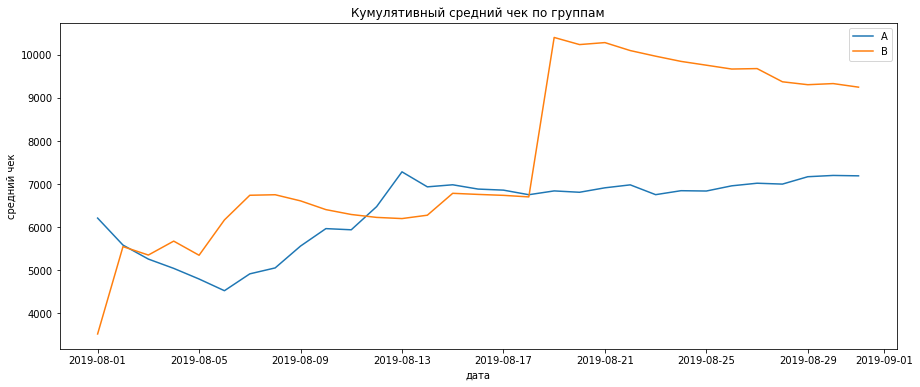

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("дата")
plt.ylabel("средний чек");

Средний чек группы А становится равномерным ближе к концу теста: после падения вначале он устанавливается на 7 000 к сентябрю. Средний чек группы В тоже поначалу нестабилен, но также заметен его резкий рост в период 20 августа 2019 года до 10 000, к сентябрю он немного снижается до 9 000. Возможно именно к этому периоду бОльшая часть группы ознакомилась с нововведением и начала им пользоваться/или оно начало на нее активно влиять.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

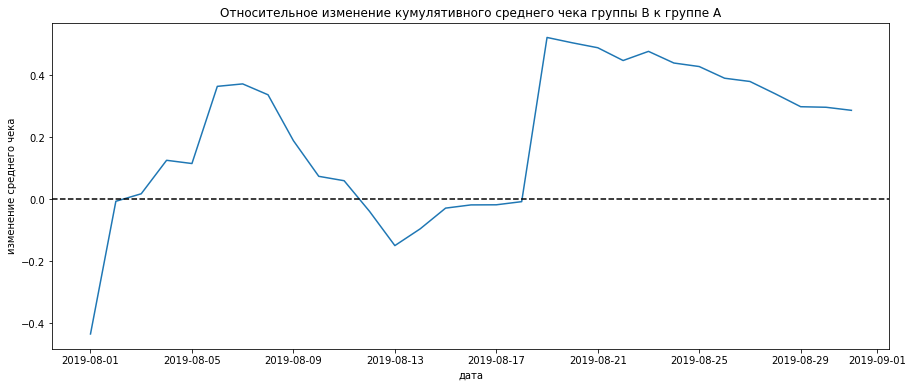

In [23]:
plt.figure(figsize=(15, 6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("дата")
plt.ylabel("изменение среднего чека");

В нескольких точках график различия между сегментами резко «скачет»: к 13 августу средний чек группы В становится меньше, чем у группы А, ходя и до и после этого периода группа В лидировала. Возможно все дело в выбросах и в крупных заказах.

### Кумулятивное среднее количество заказов на посетителя по группам

Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

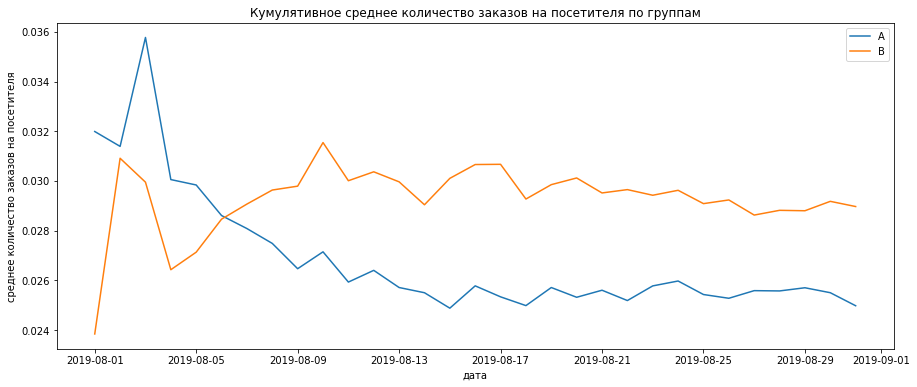

In [24]:
plt.figure(figsize=(15, 6))
# считаем кумулятивное среднее количество заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")
plt.xlabel("дата")
plt.ylabel("среднее количество заказов на посетителя");

Изначально у двух групп наблюдались скачки кумулятивного среднего количества заказов на посетителя: был резкий рост у группы А и резкий рост и падение у группы В. Однако уже после 6 августа показатель группы А стал проседать, а показатель группы В напротив стал расти. Лидирует группа В.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

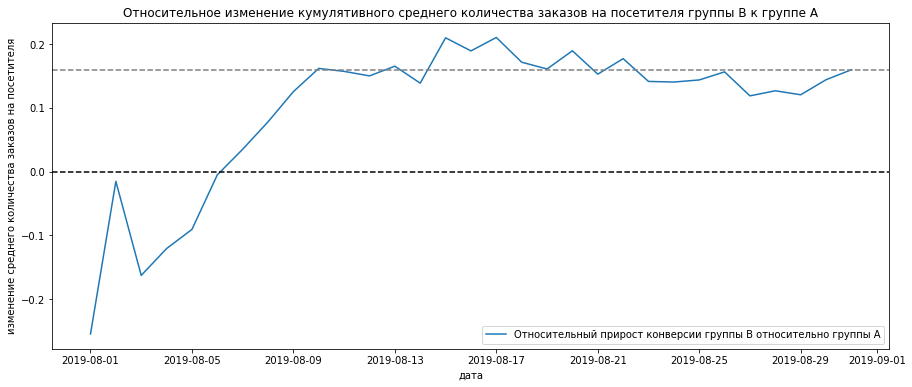

In [25]:
plt.figure(figsize=(15, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xlabel("дата")
plt.ylabel("изменение среднего количества заказов на посетителя");

Этот график также подтверждает, что вначале изменения кумулятивного среднего количества заказов на посетителя были подвержены скачкам, а после 6 августа показатель групппы В стал расти. График зафиксировался около значения 0,16.

### Количество заказов по пользователям

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


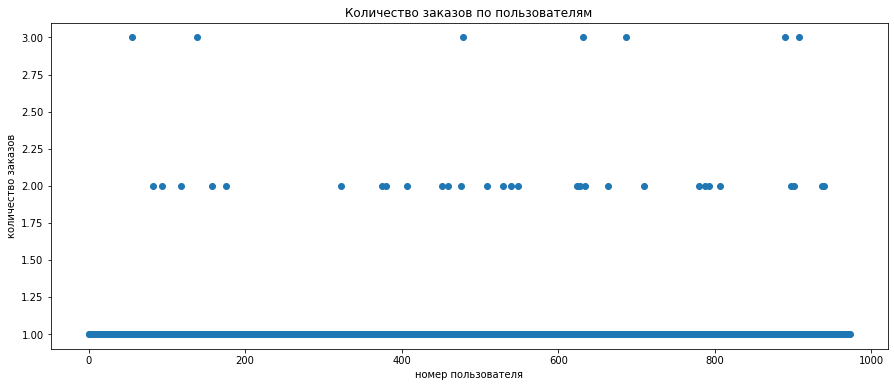

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Количество заказов по пользователям")
plt.xlabel("номер пользователя")
plt.ylabel("количество заказов");

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Расчет перцентилей

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей оформляют больше 1 покупоки, и всего 1% - больше 2. Поставим границу на 2 покупках.

### Стоимости заказов

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

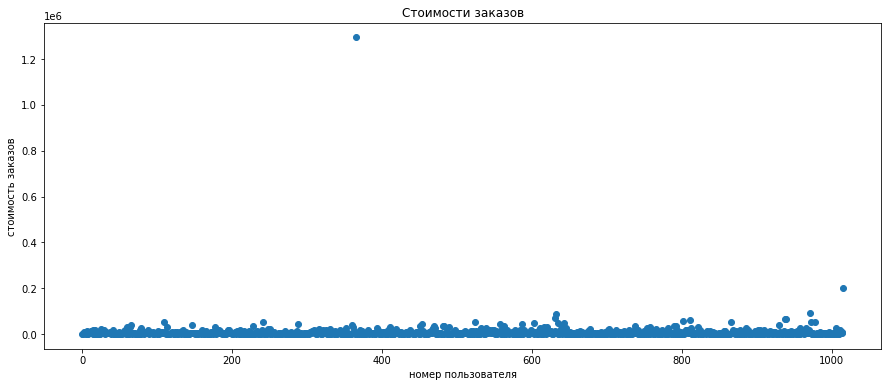

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, orders['revenue']) 
plt.title("Стоимости заказов")
plt.xlabel("номер пользователя")
plt.ylabel("стоимость заказов");

In [30]:
orders_new = orders.loc[(orders['revenue'] <= orders['revenue'].quantile(0.9988))]

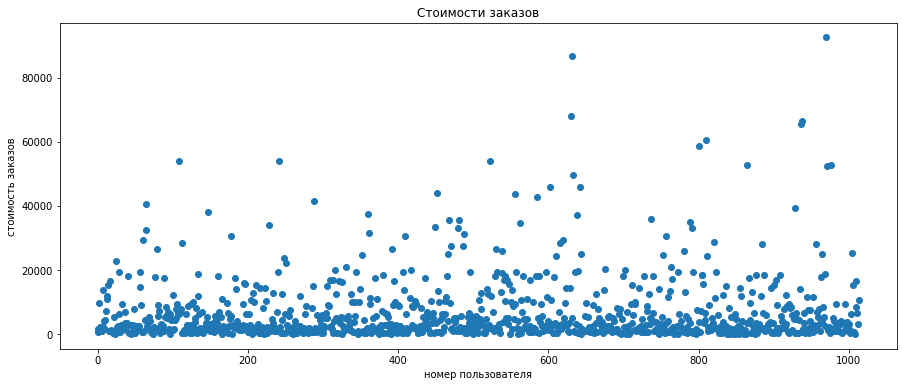

In [31]:
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, orders_new['revenue']) 
plt.title("Стоимости заказов")
plt.xlabel("номер пользователя")
plt.ylabel("стоимость заказов");

Имеются редкие относительно дорогие покупки, но пока непонятно, что считать аномалиями

### Расчет перцентилей

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [32]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей заказывают больше чем на  26 700, и всего 1% - больше чем на 53 900. Поставим границу на 53 000.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

H0: статистически значимых различий в среднем числе заказов между группами по «сырым» данным нет

H1: статистически значимые различия в среднем числе заказов между группами по «сырым» данным есть

alpha = 0.05

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value = ' "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост группы B = ' "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
Относительный прирост группы B = 0.160


Различия в среднем числе заказов групп A и B есть. 
p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Относительный прирост группы B равен 16.0%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

H0: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет

H1: статистически значимые различия в среднем чеке заказа между группами по «сырым» данным есть

alpha = 0.05

In [35]:
print('p-value = ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост группы B = ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Относительный прирост группы B = 0.287


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Однако, относительное различие среднего чека между сегментами составляет 28,7%

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Отчистим наши данные от аномальных значений, установленных ранее

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
19


In [37]:
print(round((len(orders['visitorId'].unique()) - abnormalUsers.shape[0])/len(orders['visitorId'].unique())*100,2))

98.05


В отчищенных данных мы потеряли примерно 2% пользователей. Это не критично

H0: статистически значимых различий в среднем числе заказов между группами по «отфильтрованным» данным нет

H1: статистически значимые различия в среднем числе заказов между группами по «отфильтрованным» данным есть

alpha = 0.05

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [39]:
print('p-value = ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы B = ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.006
Относительный прирост группы B = 0.192


Как и в случае с сырыми данными, статистическая значимость достигнута.
Сегмент В значительно лучше сегмента А. Подтвердилась гипотеза о том. что статистически значимые различия в среднем числе заказов между группами по «отфильтрованным» данным есть. Такой же вывод мы сделали по "сырым" данным.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

H0: статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет

H1: статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть

alpha = 0.05

In [40]:
print('p-value = '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный убыток группы B = '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.842
Относительный убыток группы B = -0.014


P-value больше 0.05 - гипотеза, что статистически значимых отличий в среднем чеке между группами нет, подтвердилась. Однако, относительное различие среднего чека сегмента В стало меньше на 1,4% сегмента А. По сырым данным у нас подтвердилась эта же гипотеза, но был зафиксирован относительный прирост среднего чека группы В по сравнению с группой А.

# Вывод

Примите решение по результатам теста и объясните его.

Я считаю, что следует остановить тест, зафиксировать победу группы В, так как выручка с этой группы увеличилась за счет увеличения среднего числа заказов почти на 20% по сравнению с группой А, несмотря на то, что статистически значимых отличий в среднем чеке между группами нет. Таким образом, можно сказать, что нововведения благоприятно повлияли на покупателей и способствовали повышению дохода интернет-магазина.